# Simple K-Means Clustering For 1000 Manga List

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data_manga = pd.read_csv("C:/Users/User/Desktop/tools/R/data/top_1000_manga.csv", index_col = 0, parse_dates = True)
data_manga.head()

,Title,Title_Synonym,Title_Japanese,Status,Volumns,Chapters,Publishing,Rank,Score,Scored_by,Popularity,Memebers,Favorites,Synopsis,Publish_period,Genre
0,Berserk,Berserk,ベルセルク,Publishing,unkown,unkown,True,1,9.39,201756,2,427894,80308,"Guts, a former mercenary now known as the ""Bla...","Aug 25, 1989 to present","'Action', 'Adventure', 'Demons', 'Drama', 'Fan..."
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,unkown,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,Finished,24,96,False,2,9.23,94427,29,160782,27459,"In the American Old West, the world's greatest...","Jan 19, 2004 to Apr 19, 2011","'Action', 'Adventure', 'Mystery', 'Historical'..."
2,One Piece,One Piece,ONE PIECE,Publishing,unkown,unkown,True,3,9.15,249936,3,410522,82310,"Gol D. Roger, a man referred to as the ""Pirate...","Jul 22, 1997 to present","'Action', 'Adventure', 'Comedy', 'Fantasy', 'S..."
3,Vagabond,Vagabond,バガボンド,On Hiatus,37,327,False,4,9.13,72613,19,211345,21596,"In 16th century Japan, Shinmen Takezou is a wi...","Sep 3, 1998 to May 21, 2015","'Action', 'Adventure', 'Drama', 'Historical', ..."
4,Monster,Monster,MONSTER,Finished,18,162,False,5,9.10,57801,33,148764,13049,"Kenzou Tenma, a renowned Japanese neurosurgeon...","Dec 5, 1994 to Dec 20, 2001","'Mystery', 'Drama', 'Psychological', 'Seinen'"


In [3]:
use_col = data_manga['Status'].isin(['Publishing','Finished'])
del_col = ['Title_Synonym', 'Title_Japanese', 'Status','Chapters', 'Volumns', 'Publishing', 'Memebers', 'Synopsis', 'Publish_period', 'Genre']
df_manga = data_manga[use_col].drop(columns = del_col)
df_manga.insert(0, 'id', range(1, 1 + len(df_manga)))
df_manga.head()

,id,Title,Rank,Score,Scored_by,Popularity,Favorites
0,1,Berserk,1,9.39,201756,2,80308
1,2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,2,9.23,94427,29,27459
2,3,One Piece,3,9.15,249936,3,82310
4,4,Monster,5,9.10,57801,33,13049
5,5,Fullmetal Alchemist,6,9.08,130375,16,26753


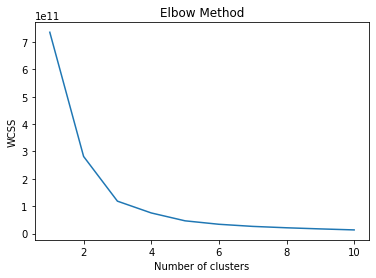

In [4]:
X = (df_manga[['Scored_by', 'Favorites', 'Score']])
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df_manga['cluster'] = kmeans.fit_predict(df_manga[['Scored_by', 'Favorites']])# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df_manga['cen_x'] = df_manga.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df_manga['cen_y'] = df_manga.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
df_manga['c'] = df_manga.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

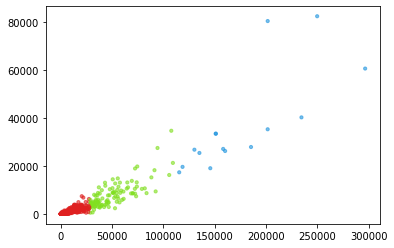

In [6]:
plt.scatter(df_manga.Scored_by, df_manga.Favorites, c=df_manga.c, alpha = 0.6, s=10)

In [7]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df_manga.Scored_by, df_manga.Favorites, df_manga.Score, c=df_manga.c, s=15)
ax.set_xlabel('Scored_by')
ax.set_ylabel('Favorites')
ax.set_zlabel('Score')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_manga.id
cluster_map['cluster'] = Y.labels_


NameError: name 'Y' is not defined